In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals

import sqlite3
import pathlib
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
import sys
import datetime, os
from sklearn import metrics
from sklearn import preprocessing
from sklearn.utils import shuffle
from time import time

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers import LeakyReLU
from tensorflow.python.keras.callbacks import TensorBoard
from tensorflow.keras.models import load_model


import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
from matplotlib import cm

from sklearn.preprocessing import StandardScaler


from sklearn.model_selection import GridSearchCV

In [63]:
con=sqlite3.connect('Gauss100.db')
raw_data=pd.read_sql_query("SELECT * FROM A",con)
data = raw_data.copy()
print(data.tail())
print(type(data))

             P1        P2        P3        P4        P5        P6        P7  \
38411  0.000010  0.000016  0.000025  0.000010  0.000016  0.000025  0.000010   
38412  0.000006  0.000006  0.000006  0.000010  0.000010  0.000010  0.000016   
38413  0.000016  0.000010  0.000006  0.000016  0.000010  0.000006  0.000016   
38414  0.000016  0.000016  0.000016  0.000010  0.000010  0.000006  0.000006   
38415  0.000006  0.000010  0.000016  0.000006  0.000010  0.000016  0.000006   

             P8        P9            F1  ...            F3            F4  \
38411  0.000010  0.000025  1.435778e-07  ...  2.783862e-09  1.421941e-07   
38412  0.000016  0.000016  1.076382e-09  ...  9.027414e-08  1.739714e-09   
38413  0.000010  0.000006  8.939471e-08  ...  1.076382e-09  9.027414e-08   
38414  0.000006  0.000006  1.739714e-09  ...  8.939471e-08  1.076382e-09   
38415  0.000006  0.000016  9.027414e-08  ...  1.739714e-09  8.939471e-08   

          A1     B1     A2     B2     A3     B3     A4     B4  
3841

<class 'pandas.core.series.Series'>


Text(0, 0.5, 'Fonction objectif')

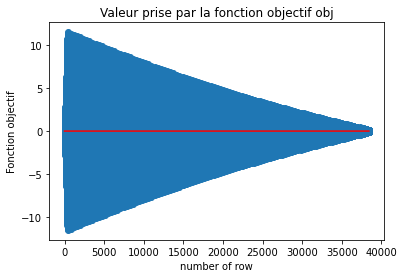

In [64]:

#Attention, on devra faire varier dt et dx (=dy)
dx=1/1001 #?
dy=1/1001 #?
dt=0.01 #?

#Calcul fonction objectif
w = data['P5']
print(type(w))
obj = ((data['F1']-data['F4'])/(dx*w))+((data['F3']-data['F2'])/(dy*w))
    
#A retenir: j'utilise le fait que la serie 'obj' suit le meme ordre d'indentation que small_data, est-ce vrai?
    
absi = data.index
plt.scatter(absi,obj)
nul = [0 for i in range((data.shape)[0])]
plt.plot(absi,nul,'r')
plt.title('Valeur prise par la fonction objectif obj')
plt.xlabel('number of row')
plt.ylabel('Fonction objectif')

In [65]:
data = data.sample(frac = 1)
data

,P1,P2,P3,P4,P5,P6,P7,P8,P9,F1,...,F3,F4,A1,B1,A2,B2,A3,B3,A4,B4
15088,1.233414e-02,1.547790e-02,1.927875e-02,1.481161e-02,1.852944e-02,2.300740e-02,1.767846e-02,2.204734e-02,2.728946e-02,9.144865e-05,...,9.284181e-05,1.091547e-04,0.395,0.605,0.485,0.515,0.495,0.505,0.385,0.615
18242,6.263398e-02,5.285460e-02,4.430444e-02,5.285460e-02,4.445221e-02,3.092366e-02,4.430444e-02,4.430444e-02,3.092366e-02,2.275745e-04,...,1.974899e-04,1.907375e-04,-0.475,-0.525,-0.525,-0.475,-0.535,-0.465,-0.465,-0.535
36749,6.570529e-02,5.182782e-02,4.047702e-02,6.707661e-02,5.294098e-02,4.213995e-02,6.825642e-02,5.389936e-02,4.213995e-02,3.559105e-04,...,2.337387e-05,3.629395e-04,0.065,-0.935,0.255,-0.745,0.265,-0.735,0.055,-0.945
26635,6.174380e-06,9.784645e-06,1.535944e-05,6.174380e-06,8.383085e-06,1.124851e-05,4.493616e-06,4.493616e-06,1.124851e-05,7.849212e-08,...,2.965851e-08,6.707462e-08,-0.325,0.675,-0.065,0.935,-0.075,0.925,-0.315,0.685
27451,9.462208e-02,9.210075e-02,9.032589e-02,9.462208e-02,1.138788e-01,1.371468e-01,1.426653e-01,1.426653e-01,1.371468e-01,3.182539e-05,...,2.932551e-04,3.915937e-05,-0.295,0.705,-0.965,0.035,-0.975,0.025,-0.285,0.715
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11303,3.540477e-08,5.517962e-08,8.531036e-08,3.540477e-08,3.777163e-08,3.986272e-08,1.639322e-08,1.639322e-08,3.986272e-08,3.487398e-10,...,2.944933e-10,2.378871e-10,-0.715,0.285,-0.175,0.825,-0.185,0.815,-0.705,0.295
2622,1.438915e-09,8.554081e-10,5.042151e-10,9.847814e-10,5.842181e-10,2.325508e-10,6.691586e-10,6.691586e-10,2.325508e-10,5.791813e-12,...,2.829806e-12,3.941382e-12,-0.075,-0.925,-0.675,-0.325,-0.685,-0.315,-0.065,-0.935
7777,5.647077e-10,3.535725e-10,2.196361e-10,8.898341e-10,5.583487e-10,5.458425e-10,1.391306e-09,8.749154e-10,5.458425e-10,3.443834e-12,...,3.106306e-12,5.416350e-12,0.805,-0.195,0.165,-0.835,0.175,-0.825,0.795,-0.205
15564,7.431317e-05,9.839601e-05,1.293925e-04,1.030465e-04,1.360786e-04,1.784684e-04,1.417972e-04,1.867484e-04,2.442620e-04,6.135292e-07,...,1.007781e-06,8.452967e-07,0.405,0.595,0.695,0.305,0.705,0.295,0.395,0.605


In [66]:
#On normalise avec scaler classique sur tout

x=data.values
scaler = preprocessing.StandardScaler()
x_scaled = scaler.fit_transform(x)
data_scaled = pd.DataFrame(x_scaled)
col = ['P1','P2','P3','P4','P5','P6','P7','P8','P9','F1','F2','F3','F4','A1','B1','A2','B2','A3','B3','A4','B4']
data_scaled.columns = ['P1','P2','P3','P4','P5','P6','P7','P8','P9','F1','F2','F3','F4','A1','B1','A2','B2','A3','B3','A4','B4']

print('moyenne:',scaler.mean_)
print('std',scaler.var_)


###Introduction inverse transform pour les flux
output_unscaled = data[['F1','F2','F3','F4']]
output_unscaled_values = output_unscaled.values
output_scaler = preprocessing.StandardScaler()
output_scaled_values = output_scaler.fit_transform(output_unscaled_values)

###Introduction inverse transform pour les valeurs d'entree du réseau
input_unscaled = data[['P1','P2','P3','P4','P5','P6','P7','P8','P9','A1','B1','A2','B2','A3','B3','A4','B4']]
input_unscaled_values = input_unscaled.values
input_scaler = preprocessing.StandardScaler()
input_scaler.fit(input_unscaled_values)

moyenne: [ 1.99765812e-01  1.99766419e-01  1.99765812e-01  2.00419062e-01
  1.99767026e-01  1.99113321e-01  1.99765812e-01  1.99766419e-01
  1.99765812e-01  5.98845546e-04  5.98845546e-04  5.98845546e-04
  5.98845546e-04 -1.84960104e-19  1.84960104e-19  6.01120338e-19
 -9.24800520e-19 -4.62400260e-20 -1.47968083e-18 -4.62400260e-19
 -1.10976062e-18]
std [1.01349510e-01 1.01349662e-01 1.01349510e-01 1.01549966e-01
 1.01349814e-01 1.01148391e-01 1.01349510e-01 1.01349662e-01
 1.01349510e-01 1.15840307e-06 1.15840307e-06 1.15840307e-06
 1.15840307e-06 3.35075000e-01 3.25075000e-01 3.25075000e-01
 3.35075000e-01 3.35075000e-01 3.25075000e-01 3.25075000e-01
 3.35075000e-01]


StandardScaler()

In [67]:
print('The shape of the initial data before spliting it'+str(data_scaled.shape))


data_training=data_scaled.sample(frac=0.7,random_state=0) 
data_test=data_scaled.drop(data_training.index)

print('The shape of the initial data for training'+str(data_training.shape))
print('The shape of the initial data for testing'+str(data_test.shape))


data_training_labels = pd.DataFrame(columns =['F1','F2','F3','F4'])
data_test_labels = pd.DataFrame(columns =['F1','F2','F3','F4'])

data_training_labels['F1']=data_training['F1']
data_training_labels['F2']=data_training['F2']
data_training_labels['F3']=data_training['F3']
data_training_labels['F4']=data_training['F4']


data_test_labels['F1']=data_test['F1']
data_test_labels['F2']=data_test['F2']
data_test_labels['F3']=data_test['F3']
data_test_labels['F4']=data_test['F4']


data_training.pop('F1')
data_training.pop('F2')
data_training.pop('F3')
data_training.pop('F4')

data_test.pop('F1')
data_test.pop('F2')
data_test.pop('F3')
data_test.pop('F4')

data_training_features=data_training
data_test_features=data_test

print('The shape of the features dataframe for training'+str(data_training_features.shape))
print('The shape of the features dataframe for testing'+str(data_test_features.shape))
print('The shape of the labels dataframe for training'+str(data_training_labels.shape))
print('The shape of the labels dataframe for testing'+str(data_test_labels.shape))

The shape of the initial data before spliting it(38416, 21)
The shape of the initial data for training(26891, 21)
The shape of the initial data for testing(11525, 21)
The shape of the features dataframe for training(26891, 17)
The shape of the features dataframe for testing(11525, 17)
The shape of the labels dataframe for training(26891, 4)
The shape of the labels dataframe for testing(11525, 4)


In [68]:
shape = len(data.columns)-4

In [69]:
def f_loss(y_true, y_pred):
    
    dx_tensor=tf.constant(1/1001)
    dy_tensor=tf.constant(1/1001)
    e = 0.000001
    n = 2
    
    wobj_list = tf.TensorArray(tf.float32, size=0, dynamic_size=True)
    for i in range(0,tf.shape(y_pred)[0]):        
        wobj_list = wobj_list.write(i,tf.add(tf.divide(tf.subtract(y_pred[i][0],y_pred[i][3]),dx_tensor),tf.divide(tf.subtract(y_pred[i][2],y_pred[i][1]),dy_tensor)))
        
    wobj = wobj_list.stack()
        
    mse = tf.reduce_mean(tf.square(tf.subtract(y_true,y_pred)))
    rest = e*pow(tf.maximum(0.0,-wobj),n)
    
    loss = mse + tf.reduce_mean(rest)
    
    return loss 

In [70]:
def build_model():
    model = keras.Sequential()
    model.add(layers.Dense(17,use_bias=True,input_shape=[shape],activation='elu'))
    model.add(keras.layers.Dropout(rate=0.2))
    
    model.add(layers.Dense(30,use_bias=True,input_shape=[shape],activation='elu'))
    model.add(keras.layers.Dropout(rate=0.2))
    
    model.add(layers.Dense(20,use_bias=True,input_shape=[shape],activation='elu'))
    model.add(keras.layers.Dropout(rate=0.2))
    
   
    
    model.add(layers.Dense(4,use_bias=True,activation='elu'))

    return model

model = build_model()
model.summary()

def train_model():
  
    
  optimizer = tf.optimizers.Adam() #Algorithm d'optimisation

  model.compile(loss=f_loss,
                optimizer='adam',
                metrics=['mse'])

  early_stop = keras.callbacks.EarlyStopping(monitor='val_mse',min_delta=1e-17, patience=10)
  logdir = os.path.join("logs", datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
  tensorboard_callback = tf.keras.callbacks.TensorBoard(logdir, histogram_freq=1,profile_batch=0)


  model.fit(data_training_features, 
            data_training_labels, 
            epochs=1200,
            batch_size=40,
            validation_split = 0.5, 
            verbose=0, 
            callbacks=[early_stop,tensorboard_callback])

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_46 (Dense)             (None, 17)                306       
_________________________________________________________________
dropout_35 (Dropout)         (None, 17)                0         
_________________________________________________________________
dense_47 (Dense)             (None, 30)                540       
_________________________________________________________________
dropout_36 (Dropout)         (None, 30)                0         
_________________________________________________________________
dense_48 (Dense)             (None, 20)                620       
_________________________________________________________________
dropout_37 (Dropout)         (None, 20)                0         
_________________________________________________________________
dense_49 (Dense)             (None, 4)               

In [71]:
train_model()
model.save("Advection2D_contrainteLoss-base_corrige_gauss21.h5")

In [72]:
Y_pred_scaled=model.predict(data_test_features) #output du réseau, qu'on veut comparer a Y_test
Y_test_scaled=data_test_labels

Y_pred_df=pd.DataFrame(Y_pred_scaled,columns=['F1','F2','F3','F4'])

In [73]:
Y_pred_unscaled = output_scaler.inverse_transform(Y_pred_scaled)
Y_test_unscaled = output_scaler.inverse_transform(Y_test_scaled)

Y_pred_unscaled_df = pd.DataFrame(Y_pred_unscaled,columns=['F1','F2','F3','F4'])
Y_test_unscaled_df = pd.DataFrame(Y_test_unscaled,columns=['F1','F2','F3','F4'])

moyenne: 0.0026468724069627163
ecart-type: 0.0028638034002051397
moyenne du scaler[0.00059885 0.00059885 0.00059885 0.00059885]
variance du scaler[1.15840307e-06 1.15840307e-06 1.15840307e-06 1.15840307e-06]
nb de wobj_unscaled effectué positif: 11491
nb de wobj_unscaled effectué négatif: 34


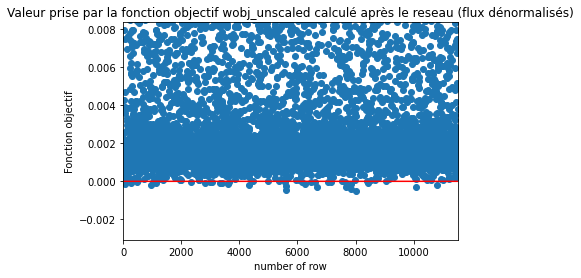

In [74]:
#On va étudier avec wobj en dénormalisé
dx=1/1001 #? Attention; ils ne sont pas normalisés ceux-là!
dy=1/1001 #?
dt=0.01 #?
wobj_unscaled = ((Y_pred_unscaled_df['F1']-Y_pred_unscaled_df['F4'])/(dx))+((Y_pred_unscaled_df['F3']-Y_pred_unscaled_df['F2'])/(dy))

absi = wobj_unscaled.index
plt.scatter(absi,wobj_unscaled)
print('moyenne:',wobj_unscaled.mean())
print('ecart-type:',wobj_unscaled.std())
nul = [0 for i in range((wobj_unscaled.shape)[0])]
plt.plot(absi,nul,'r')


x_min = absi[0]
x_max = absi.shape[0]
y_max = wobj_unscaled.mean() + 2*wobj_unscaled.std()
y_min = wobj_unscaled.mean() - 2*wobj_unscaled.std()
print('moyenne du scaler'+str(output_scaler.mean_))
print('variance du scaler'+str(output_scaler.var_))

plt.title('Valeur prise par la fonction objectif wobj_unscaled calculé après le reseau (flux dénormalisés)')
plt.xlabel('number of row')
plt.ylabel('Fonction objectif')
plt.axis([x_min, x_max, y_min, y_max])


### Ici tout est dénormalisé
wobj_unscaled = wobj_unscaled.to_frame()
wobj_unscaled.columns = ['wobj_unscaled']

au_dessus_realise = wobj_unscaled.loc[wobj_unscaled['wobj_unscaled']>=0]
nb_au_dessus_realise = au_dessus_realise.shape[0]
print('nb de wobj_unscaled effectué positif: '+str(nb_au_dessus_realise))
en_dessous_realise = wobj_unscaled.loc[wobj_unscaled['wobj_unscaled']<0]
nb_en_dessous_realise = en_dessous_realise.shape[0]
print('nb de wobj_unscaled effectué négatif: '+str(nb_en_dessous_realise))

In [75]:
def visualize1(): #we feed it the test data
    plt.scatter(data_test_labels['F1'],Y_pred_df['F1'], color = 'red',marker=".")
    plt.scatter(data_test_labels['F1'],data_test_labels['F1'], color = 'black',marker=".") #just for the y=x black line, the result (red points) should be close to the line
    
    plt.title('Neural Network prediction de F1')
    plt.xlabel('exact')
    plt.ylabel('prediction')
    
    R2=metrics.r2_score(data_test_labels, Y_pred_df)
    
  
    print('Model Performance')
   
    print('R2: {:0.4f}.'.format(R2))
    
    plt.show()   
    
def visualize2(): #we feed it the test data
    plt.scatter(data_test_labels['F2'],Y_pred_df['F2'], color = 'red',marker=".")
    plt.scatter(data_test_labels['F2'],data_test_labels['F2'], color = 'black',marker=".") #just for the y=x black line, the result (red points) should be close to the line
    
    
    plt.title('Neural Network prediction de F2')
    plt.xlabel('exact')
    plt.ylabel('prediction')
    
    R2=metrics.r2_score(data_test_labels, Y_pred_df)
    
   
    
    print('Model Performance')
 
    print('R2: {:0.4f}.'.format(R2))
    
    plt.show()
    

def visualize3(): #we feed it the test data
    plt.scatter(data_test_labels['F3'],Y_pred_df['F3'], color = 'red',marker=".")
    plt.scatter(data_test_labels['F3'],data_test_labels['F3'], color = 'black',marker=".") #just for the y=x black line, the result (red points) should be close to the line
    
    
    plt.title('Neural Network prediction de F3')
    plt.xlabel('exact')
    plt.ylabel('prediction')
    
    R2=metrics.r2_score(data_test_labels, Y_pred_df)
    
    Correl=np.corrcoef(data_test_labels, Y_pred_df)[0, 1]
    
    print('Model Performance')
    print('Correlation: {:0.4f}.'.format(Correl))
    print('R2: {:0.4f}.'.format(R2))
    
    plt.show()
    
def visualize4(): #we feed it the test data
    plt.scatter(data_test_labels['F4'],Y_pred_df['F4'], color = 'red',marker=".")
    plt.scatter(data_test_labels['F4'],data_test_labels['F4'], color = 'black',marker=".") #just for the y=x black line, the result (red points) should be close to the line
    
    
    plt.title('Neural Network prediction de F4')
    plt.xlabel('exact')
    plt.ylabel('prediction')
    
    R2=metrics.r2_score(data_test_labels, Y_pred_df)
    
    Correl=np.corrcoef(data_test_labels, Y_pred_df)[0, 1]
    
    print('Model Performance')
    print('Correlation: {:0.4f}.'.format(Correl))
    print('R2: {:0.4f}.'.format(R2))
    
    plt.show()
    



Model Performance
R2: 0.9763.


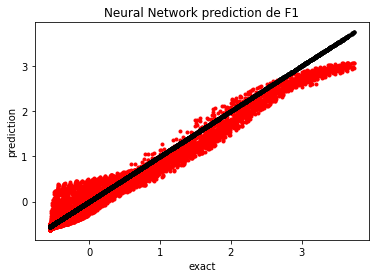

Model Performance
R2: 0.9763.


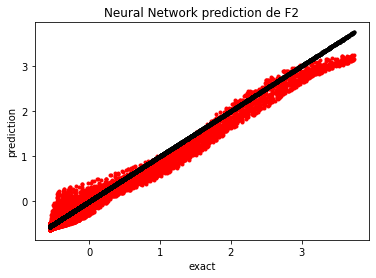

MemoryError: Unable to allocate 3.96 GiB for an array with shape (23050, 23050) and data type float64

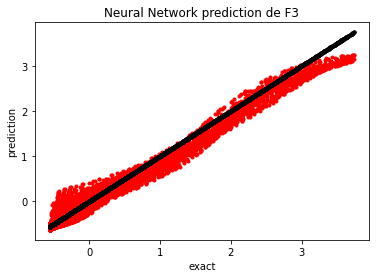

In [76]:
visualize1()
visualize2()
visualize3()
visualize4()